In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
from pandas import read_excel

In [2]:
train_data = pd.read_excel('프로그램.xlsx')
train_data.head()

,Unnamed: 0,프로그램명,유형,내용,강좌개설정보,구청
0,NaN,직장인요가,생활체육,"바쁜 일상 속 신체 벨런스가 무너진 직장인을 위한 몸의 바른 정렬을 중시, 정확한 ...",1,관악구
1,NaN,밴드체조,생활체육,"밴드를 이용하여 진행하는 체조, 강사님을 따라하는 체조로 밴드에 가하는 힘에 의하여...",0,관악구
2,NaN,탁구교실,생활체육,직사각형 나무 탁자에 네트를 걸고 양 사이드에 선수들이 서서 탁구채로 속이 빈 작은...,0,관악구
3,NaN,스마트폰 사진편집,IT관련,"스마트폰 갤러리에 있는 사진으로 나만의 사진 편집하기, 라인 카메라 시작하기, 갤러...",1,관악구
4,NaN,명상과 스트레칭,생활체육,고요히 눈을 감고 차분한 마음으로 깊이 생각하는 것이다. 명상은 일체의 '잡생각'을...,0,관악구


In [3]:
print("전체 학습 데이터의 개수: {}".format(len(train_data)))

전체 학습 데이터의 개수: 1184


In [4]:
train_length = train_data['내용'].astype(str).apply(len)
train_length.head()

0     88
1    123
2    215
3     95
4    112
Name: 내용, dtype: int64

Text(0, 0.5, 'Number of review')

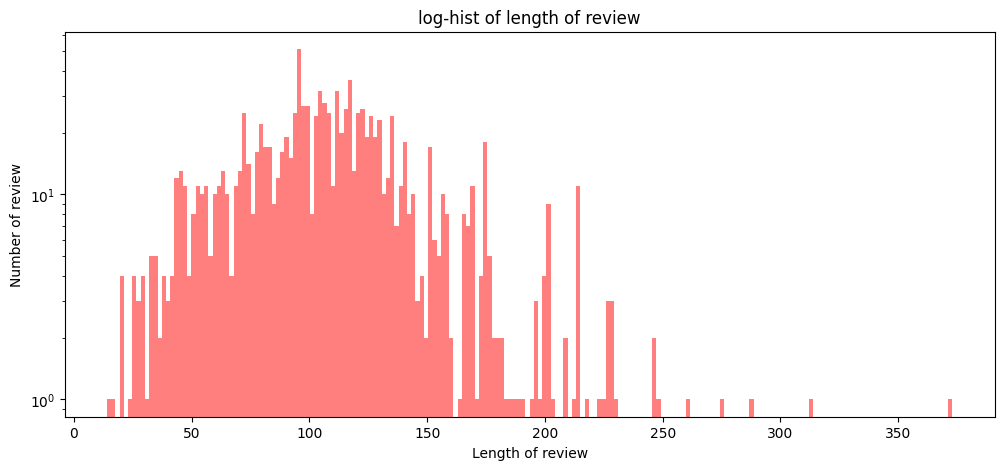

In [5]:
# 전체 데이터에 대해 길이에 대한 히스토그램을 그린다.
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonpositive='clip')
plt.title('log-hist of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [6]:
import numpy as np
print("문장 최대 길이 :{}".format(np.max(train_length)))
print("문장 최소 길이 :{}".format(np.min(train_length)))
print("문장 평균 길이 :{:.2f}".format(np.mean(train_length)))
print("문장 길이 표준편차 : {:.2f}".format(np.std(train_length)))
print("문장 중간 길이: {}".format(np.median(train_length)))
print('제1사분위 길이:{}'.format(np.percentile(train_length, 25)))
print('제3사분위 길이:{}'.format(np.percentile(train_length, 75)))

문장 최대 길이 :373
문장 최소 길이 :14
문장 평균 길이 :108.76
문장 길이 표준편차 : 41.82
문장 중간 길이: 106.0
제1사분위 길이:82.0
제3사분위 길이:129.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1e9074e5190>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9074c1f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9074e5f70>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9074c1100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9074ce670>],
 'means': [<matplotlib.lines.Line2D at 0x1e9074c1940>]}

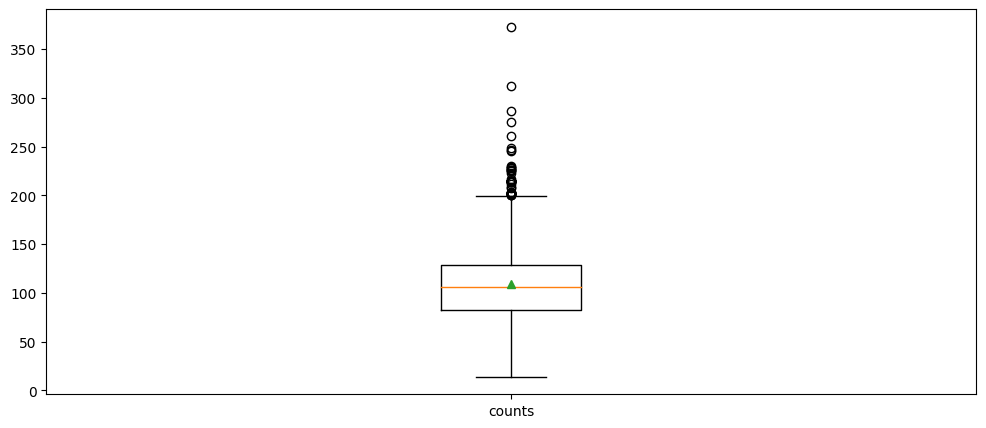

In [7]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

In [8]:
# 문자열이 아닌 데이터는 모두 제거한다. 
train_review = [review for review in train_data['내용'] if type(review) is str]

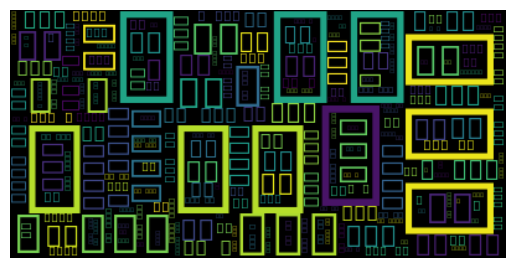

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = "Malgun Gothic"

# WordCloud 객체 생성
wordcloud = WordCloud().generate(' '.join(train_review))

# WordCloud를 이미지로 표시
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: ylabel='count'>

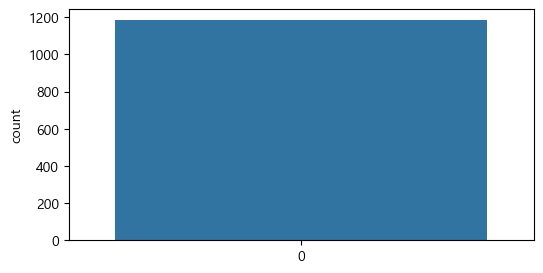

In [10]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['강좌개설정보'])

Text(0, 0.5, 'Number of reviews')

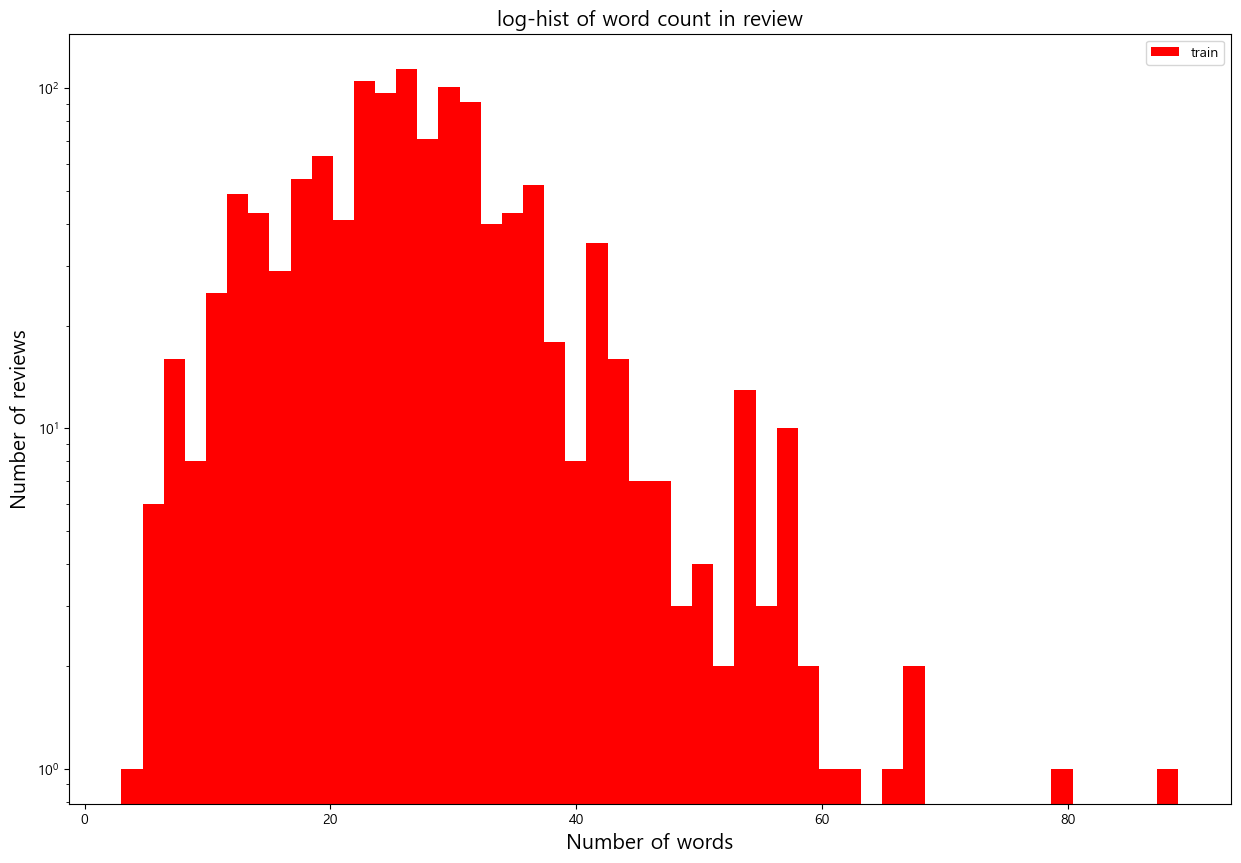

In [11]:
# 각 문장의 단어 수를 확인해보자
train_word_counts = train_data['내용'].astype(str).apply(lambda x : len(x.split(' ')))
plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('log-hist of word count in review', fontsize=15)
plt.yscale('log', nonpositive='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [12]:
print("문장 최대 길이 :{}".format(np.max(train_word_counts)))
print("문장 최소 길이 :{}".format(np.min(train_word_counts)))
print("문장 평균 길이 :{:.2f}".format(np.mean(train_word_counts)))
print("문장 길이 표준편차 : {:.2f}".format(np.std(train_word_counts)))
print("문장 중간 길이: {}".format(np.median(train_word_counts)))
print('제1사분위 길이:{}'.format(np.percentile(train_word_counts, 25)))
print('제3사분위 길이:{}'.format(np.percentile(train_word_counts, 75)))

문장 최대 길이 :89
문장 최소 길이 :3
문장 평균 길이 :26.89
문장 길이 표준편차 : 10.27
문장 중간 길이: 26.0
제1사분위 길이:21.0
제3사분위 길이:32.0


In [13]:
train_word_counts

0       24
1       30
2       57
3       21
4       26
        ..
1179     7
1180     9
1181     8
1182     9
1183     8
Name: 내용, Length: 1184, dtype: int64

In [14]:
# 각 단어에 대해 특수문자 유무를 확인 특별한 특수문자는 없으므로 마침표 물음표 확인
qmarks = np.mean(train_data['내용'].astype(str).apply(lambda x : "?" in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['내용'].astype(str).apply(lambda x : "." in x))
reststop = np.mean(train_data['내용'].astype(str).apply(lambda x : "," in x))
print('물음표가 있는 질문 : {:.2f}%'.format(qmarks * 100))
print("마침표가 있는 질문 : {:.2f}%".format(fullstop * 100))
print('쉼표가 있는 질문 : {:.2f}%'.format(reststop *100))

물음표가 있는 질문 : 3.63%
마침표가 있는 질문 : 61.99%
쉼표가 있는 질문 : 72.80%


In [15]:
train_data['내용'][:5]

0    바쁜 일상 속 신체 벨런스가 무너진 직장인을 위한 몸의 바른 정렬을 중시, 정확한 ...
1    밴드를 이용하여 진행하는 체조, 강사님을 따라하는 체조로 밴드에 가하는 힘에 의하여...
2    직사각형 나무 탁자에 네트를 걸고 양 사이드에 선수들이 서서 탁구채로 속이 빈 작은...
3    스마트폰 갤러리에 있는 사진으로 나만의 사진 편집하기, 라인 카메라 시작하기, 갤러...
4    고요히 눈을 감고 차분한 마음으로 깊이 생각하는 것이다. 명상은 일체의 '잡생각'을...
Name: 내용, dtype: object

In [16]:
# 한글 문자가 아닌 것들을 모두 제거
import re
review_text = re.sub("[^가-힣ㄱ-ㅎㅏ\\s|]", "", train_data['내용'][0])
print(review_text)

바쁜 일상 속 신체 벨런스가 무너진 직장인을 위한 몸의 바른 정렬을 중시 정확한 자세와 호흡법 연결 순서의 완성도 행위 속의 명상추구 보조 도구의 활동


In [17]:
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  # 1. 한글 및 공백을 제외한 문자를 모두 제거
  review_text = re.sub("[^가-힣ㄱ-ㅎㅏ\\s|]", "", review)
  # 2. okt 객체를 활용해 형태소 단위로 나눈다.
  word_review = okt.morphs(review_text, stem=True)

  if remove_stopwords:
    # 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [18]:
# pip install konlpy
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
stop_words = ['에','및','은','을','와', '는', '이', '가', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한', '도']
okt = Okt()
clean_train_review = []

for review in train_data['내용']:
  # 비어있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
  else:
    clean_train_review.append([]) # string이 아니면 비어있는 값 추가

clean_train_review[:4]

[['바쁘다',
  '일상',
  '속',
  '신체',
  '벨런스',
  '무너지다',
  '직장인',
  '위',
  '몸',
  '바르다',
  '정렬',
  '중시',
  '정확하다',
  '자세',
  '호흡',
  '법',
  '연결',
  '순서',
  '완성',
  '행위',
  '속',
  '명상',
  '추구',
  '보조',
  '도구',
  '활동'],
 ['밴드',
  '를',
  '이용',
  '하다',
  '진행',
  '하다',
  '체조',
  '강사',
  '님',
  '따르다',
  '체조',
  '로',
  '밴드',
  '가하다',
  '힘',
  '의하다',
  '운동',
  '효과',
  '나타나다',
  '가해',
  '지는',
  '힘',
  '따르다',
  '체조',
  '모양',
  '이나',
  '형태',
  '달라지다',
  '어린이',
  '부터',
  '어르신',
  '까지',
  '모두',
  '함께',
  '하다',
  '있다',
  '간단하다',
  '체조',
  '다'],
 ['직사각형',
  '나무',
  '탁자',
  '네트',
  '를',
  '걸다',
  '양',
  '사이드',
  '선수',
  '서서',
  '탁구',
  '채',
  '로',
  '속이다',
  '빈',
  '작다',
  '플라스틱',
  '재질',
  '공',
  '치다',
  '넘기다',
  '하다',
  '운동',
  '이다',
  '얼핏',
  '보다',
  '사람',
  '둘이서',
  '탁자',
  '하나',
  '놓다',
  '이리저리',
  '움직이다',
  '공',
  '치다',
  '게',
  '탁구',
  '를',
  '하다',
  '번',
  '안',
  '해보다',
  '혹은',
  '눈',
  '앞',
  '에서만',
  '보다',
  '온',
  '사람',
  '에게는',
  '쉬다',
  '간단하다',
  '보이다',
  '실상',
  '뛰어나다',
  '반',
  '사',
  '신경',
 

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)

word_vocab = tokenizer.word_index # 단어 사전 형태

MAX_SEQUENCE_LENGTH = 27 # 문장 최대 길이

train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
# 학습 데이터를 벡터화
train_labels = np.array(train_data['강좌개설정보']) # 학습 데이터 라벨

In [20]:
def flatten_list(nested_list):
    flattened = []
    for item in nested_list:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened

flat_list = flatten_list(clean_train_review)

print(flat_list)
prepro_configs = {word: index + 1 for index, word in enumerate(flat_list)}

print(prepro_configs)
from collections import Counter

flat_list = flatten_list(clean_train_review)
word_counts = Counter(flat_list)

print(word_counts)

['바쁘다', '일상', '속', '신체', '벨런스', '무너지다', '직장인', '위', '몸', '바르다', '정렬', '중시', '정확하다', '자세', '호흡', '법', '연결', '순서', '완성', '행위', '속', '명상', '추구', '보조', '도구', '활동', '밴드', '를', '이용', '하다', '진행', '하다', '체조', '강사', '님', '따르다', '체조', '로', '밴드', '가하다', '힘', '의하다', '운동', '효과', '나타나다', '가해', '지는', '힘', '따르다', '체조', '모양', '이나', '형태', '달라지다', '어린이', '부터', '어르신', '까지', '모두', '함께', '하다', '있다', '간단하다', '체조', '다', '직사각형', '나무', '탁자', '네트', '를', '걸다', '양', '사이드', '선수', '서서', '탁구', '채', '로', '속이다', '빈', '작다', '플라스틱', '재질', '공', '치다', '넘기다', '하다', '운동', '이다', '얼핏', '보다', '사람', '둘이서', '탁자', '하나', '놓다', '이리저리', '움직이다', '공', '치다', '게', '탁구', '를', '하다', '번', '안', '해보다', '혹은', '눈', '앞', '에서만', '보다', '온', '사람', '에게는', '쉬다', '간단하다', '보이다', '실상', '뛰어나다', '반', '사', '신경', '과', '구질', '파악', '하다', '대응', '하다', '감각', '요구', '하다', '고도', '스포츠', '다', '스마트폰', '갤러리', '있다', '사진', '으로', '나', '만의', '사진', '편집', '하다', '라인', '카메라', '시작', '하다', '갤러리', '사진', '편집', '하다', '콜라주', '를', '이용', '하다', '사진', '꾸미다', '인물', '보정', '하다', '사진', '다양하

In [21]:
# Sum all values in the prepro_configs dictionary
total_value = sum(word_counts.values())

# Set the 'vocab_size' key in prepro_configs to the total value
prepro_configs['vocab_size'] = total_value
prepro_configs['vocab_size']

40775

In [22]:
model_name = 'cnn_classifier_kr'
BATCH_SIZE = 256
NUM_EPOCHS = 3
VALID_SPLIT = 0.1
MAX_LEN = 10 # 이거 대기
kargs = {'model_name' : model_name, 'vocab_size' : prepro_configs['vocab_size'],
         'embedding_size':128, 'num_filters':100, 'dropout_rate':0.5, 'hidden_dimension':250, 
         'output_dimension':1} # 이부분도 대기 

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

from tqdm import tqdm
x_train, x_test, y_train, y_test = train_test_split(train_inputs, train_labels, test_size = 0.3, random_state = 777)
print("훈련용 데이터셋 크기: %s, 검증용 데이터셋 크기: %s" % (x_train.shape,  x_test.shape))
print("훈련용 레이블 크기: %s, 검증용 레이블 크기: %s" % (y_train.shape,  y_test.shape))

훈련용 데이터셋 크기: (828, 27), 검증용 데이터셋 크기: (356, 27)
훈련용 레이블 크기: (828,), 검증용 레이블 크기: (356,)


In [24]:
class CNNClassifier(tf.keras.Model):
  def __init__(self, **kargs):
    super(CNNClassifier, self).__init__(name=kargs['model_name'])
    self.embedding = layers.Embedding(input_dim=prepro_configs['vocab_size'], 
                                      output_dim=kargs['embedding_size'])
    self.conv_list = [layers.Conv1D(filters=kargs["num_filters"], kernel_size=kernel_size,
                                    padding='valid', activation=tf.keras.activations.relu,
                                    kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.),
                                    )
                                    for kernel_size in [3,4,5]]
    self.pooling = layers.GlobalMaxPool1D()
    self.dropout = layers.Dropout(kargs['dropout_rate'])
    self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                            activation=tf.keras.activations.relu,
                            kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    self.fc2 = layers.Dense(units=kargs['output_dimension'], 
                            activation=tf.keras.constraints.MaxNorm(max_value=3.))
    
  def call(self, x):
    x = self.embedding(x)
    x = self.dropout(x)
    x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=1)
    x = self.fc1(x)
    x = self.fc2(x)

    return x                           

In [25]:
model = CNNClassifier(**kargs)

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [26]:
earlystop_callback = EarlyStopping(monitor='val_accuary', min_delta=0.0001, patience=2)

checkpoint_path = model_name + '/weigths.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
  print("{} -- Folder create complete \n".format(checkpoint_dir))
else:
  os.makedirs(checkpoint_dir, exist_ok=True)
  print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True,
                              save_weights_only=True)
history = model.fit(train_inputs, train_labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

cnn_classifier_kr -- Folder create complete 

Epoch 1/3
5/5 [==============================] - ETA: 0s - loss: 1.6617 - accuracy: 0.5474WARNING:tensorflow:Early stopping conditioned on metric `val_accuary` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 1: val_accuracy improved from -inf to 0.51261, saving model to cnn_classifier_kr\weigths.h5
5/5 [==============================] - 3s 248ms/step - loss: 1.6617 - accuracy: 0.5474 - val_loss: 0.7862 - val_accuracy: 0.5126
Epoch 2/3
5/5 [==============================] - ETA: 0s - loss: 0.8513 - accuracy: 0.5502WARNING:tensorflow:Early stopping conditioned on metric `val_accuary` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 2: val_accuracy did not improve from 0.51261
5/5 [==============================] - 1s 131ms/step - loss: 0.8513 - accuracy: 0.5502 - val_loss: 0.7848 - val_accuracy: 0.5126
Epoch 3/3
5/5 [==============================] - ETA: 0s - 

In [27]:
earlystop_callback = EarlyStopping(monitor='val_accuary', min_delta=0.0001, patience=2)
cp_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True,
                              save_weights_only=True)
history = model.fit(train_inputs, train_labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Epoch 1/3
5/5 [==============================] - ETA: 0s - loss: 0.8412 - accuracy: 0.5521WARNING:tensorflow:Early stopping conditioned on metric `val_accuary` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 1: val_accuracy improved from -inf to 0.51261, saving model to cnn_classifier_kr\weigths.h5
5/5 [==============================] - 1s 212ms/step - loss: 0.8412 - accuracy: 0.5521 - val_loss: 0.7825 - val_accuracy: 0.5126
Epoch 2/3
5/5 [==============================] - ETA: 0s - loss: 0.8278 - accuracy: 0.5606WARNING:tensorflow:Early stopping conditioned on metric `val_accuary` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 2: val_accuracy did not improve from 0.51261
5/5 [==============================] - 1s 133ms/step - loss: 0.8278 - accuracy: 0.5606 - val_loss: 0.7811 - val_accuracy: 0.5126
Epoch 3/3
5/5 [==============================] - ETA: 0s - loss: 0.8278 - accuracy: 0.5577WARNING:tensorf

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GRU
#모델 개발
model = Sequential()

# input_dim의 크기는 토큰 생성시 지정한 최대 단어수(vocab_size)와 동일하게 설정
# output_dim의 크기는 input_dim보다 작은 값 중에서 설정
model.add(Embedding(input_dim = total_value, output_dim = 32))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          1304800   
                                                                 
 gru (GRU)                   (None, 128)               62208     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1367137 (5.22 MB)
Trainable params: 1367137 (5.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
result = model.fit(x_train, y_train, batch_size = 10, epochs = 500, validation_data=(x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

Epoch 1/500
83/83 [==============================] - 6s 39ms/step - loss: 0.6543 - acc: 0.6039 - val_loss: 0.5438 - val_acc: 0.7444 - lr: 0.0010
Epoch 2/500
83/83 [==============================] - 2s 28ms/step - loss: 0.3159 - acc: 0.8768 - val_loss: 0.4444 - val_acc: 0.8258 - lr: 0.0010
Epoch 3/500
83/83 [==============================] - 2s 28ms/step - loss: 0.1291 - acc: 0.9626 - val_loss: 0.4314 - val_acc: 0.8315 - lr: 0.0010
Epoch 4/500
83/83 [==============================] - 3s 32ms/step - loss: 0.0889 - acc: 0.9771 - val_loss: 0.6272 - val_acc: 0.8258 - lr: 0.0010
Epoch 5/500
83/83 [==============================] - 3s 31ms/step - loss: 0.0662 - acc: 0.9843 - val_loss: 0.6650 - val_acc: 0.8258 - lr: 0.0010
Epoch 6/500
83/83 [==============================] - ETA: 0s - loss: 0.0666 - acc: 0.9807
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
83/83 [==============================] - 2s 27ms/step - loss: 0.0666 - acc: 0.9807 - val_loss: 0.4953 - val_a